# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chadburford/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

print(api_key)

7b8a10d805e149b1ac4656fe1b508759


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin AND 2022", language="en")
btc_headlines["articles"][0]

{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': None,
 'title': 'Wall St Week Ahead Crypto investors face more uncertainty after rocky start to 2022 - Reuters',
 'description': 'Investors are bracing for more gyrations in bitcoin and other cryptocurrencies, as worries over a hawkish Federal Reserve threaten to squelch risk appetite across markets.',
 'url': 'https://www.reuters.com/business/finance/wall-st-week-ahead-crypto-investors-face-more-uncertainty-after-rocky-start-2022-2022-02-11/',
 'urlToImage': 'https://www.reuters.com/resizer/o-neidYH62soGCDm3MOwoSkkRqc=/1200x628/smart/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/AOEOU7DFBRN5ZA32VLFEUPFGKY.jpg',
 'publishedAt': '2022-02-11T20:11:00Z',
 'content': 'NEW YORK, Feb 11 (Reuters) - Investors are bracing for more gyrations in bitcoin and other cryptocurrencies, as worries over a hawkish Federal Reserve threaten to squelch risk appetite across markets… [+5024 chars]'}

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum AND 2022", language="en")
eth_headlines["articles"][0]

{'source': {'id': None, 'name': 'Investorplace.com'},
 'author': 'InvestorPlace',
 'title': 'The Market Has Spoken, and It Says Ethereum Is Valuable',
 'description': 'Technical analysis isn’t a perfect tool, but it may point the way for Ethereum Ethereum\xa0(ETH-USD) continues to be a volatile crypto investment. Crypto is volatile by nature — I’m not setting it apart from the asset class. It\xa0 has clear catalysts as well as mu…',
 'url': 'https://investorplace.com/2022/02/the-market-has-spoken-and-it-says-ethereum-matters/',
 'urlToImage': 'https://images.readwrite.com/wp-content/uploads/2021/12/The-Role-of-Crypto-in-The-Fintech-Industry-and-The-Wider-Economy.jpg',
 'publishedAt': '2022-02-17T17:10:12Z',
 'content': 'Technical analysis isnt a perfect tool, but it may point the way for Ethereum\r\nEthereum\xa0(ETH-USD\r\n) continues to be a volatile crypto investment. Crypto is volatile by nature Im not setting it apart … [+3612 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2022-02-11,"NEW YORK, Feb 11 (Reuters) - Investors are bra...",-0.7579,0.000,0.211,0.789
1,2022-02-14,"If Sundays Super Bowl ads are any indication, ...",0.7783,0.163,0.000,0.837
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
3,2022-02-28,Nurphoto/Getty\r\nAs Russia launched an invasi...,0.1280,0.048,0.000,0.952
4,2022-02-21,"Bitcoin is likely entering a \r\nbear market, ...",0.0000,0.000,0.000,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.0,0.059,0.941
1,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.0,0.083,0.917
2,2022-02-24,A version of this article was published in TIM...,0.0000,0.0,0.000,1.000
3,2022-03-03,"It seems that in 2022, you cant escape from th...",-0.1326,0.0,0.044,0.956
4,2022-03-03,As the international community rallies around ...,0.0000,0.0,0.000,1.000


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.056005,0.089450,0.069850,0.840750
std,0.538067,0.092135,0.073225,0.097244
min,-0.757900,0.000000,0.000000,0.627000
25%,-0.339125,0.000000,0.000000,0.780750
50%,-0.025800,0.066500,0.059500,0.842000
75%,0.580200,0.166750,0.074750,0.924750
max,0.872000,0.282000,0.251000,1.000000


In [9]:
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.047590,0.058200,0.03960,0.90215
std,0.397451,0.078152,0.06508,0.11041
min,-0.670500,0.000000,0.00000,0.62700
25%,-0.137725,0.000000,0.00000,0.83175
50%,0.000000,0.000000,0.00000,0.93450
75%,0.090300,0.096000,0.06625,1.00000
max,0.848100,0.223000,0.25100,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'said'}


In [39]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
  
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [43]:
# Create a new tokens column for Bitcoin
# tokens = tokenizer(btc_df['text'])
# btc_df.append({"tokens": tokens})
btc_df['Token'] = btc_df['text'].apply(tokenizer)

In [44]:
btc_df.head()

,date,text,compound,positive,negative,neutral,Token
0,2022-02-11,"NEW YORK, Feb 11 (Reuters) - Investors are bra...",-0.7579,0.000,0.211,0.789,"[new, york, feb, reuters, investors, bracing, ..."
1,2022-02-14,"If Sundays Super Bowl ads are any indication, ...",0.7783,0.163,0.000,0.837,"[sundays, super, bowl, ad, indication, crypto,..."
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917,"[illustration, james, bareham, verge, million,..."
3,2022-02-28,Nurphoto/Getty\r\nAs Russia launched an invasi...,0.1280,0.048,0.000,0.952,"[nurphotogettyas, russia, launched, invasion, ..."
4,2022-02-21,"Bitcoin is likely entering a \r\nbear market, ...",0.0000,0.000,0.000,1.000,"[bitcoin, likely, entering, bear, market, next..."


In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [66]:
from collections import Counter
from nltk import ngrams

In [75]:
# Generate the Bitcoin N-grams where N=2
btc_ngram_counts = ngrams(tokenizer(btc_df['text'].str.cat()), 2)
Counter(btc_ngram_counts).most_common(20)                    

[(('ha', 'donated'), 2),
 (('rose', 'wednesday'), 2),
 (('march', 'reuters'), 2),
 (('new', 'york'), 1),
 (('york', 'feb'), 1),
 (('feb', 'reuters'), 1),
 (('reuters', 'investors'), 1),
 (('investors', 'bracing'), 1),
 (('bracing', 'gyration'), 1),
 (('gyration', 'bitcoin'), 1),
 (('bitcoin', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'worry'), 1),
 (('worry', 'hawkish'), 1),
 (('hawkish', 'federal'), 1),
 (('federal', 'reserve'), 1),
 (('reserve', 'threaten'), 1),
 (('threaten', 'squelch'), 1),
 (('squelch', 'risk'), 1),
 (('risk', 'appetite'), 1),
 (('appetite', 'across'), 1)]

In [76]:
# Generate the Ethereum N-grams where N=2
eth_ngram_counts = ngrams(tokenizer(eth_df['text'].str.cat()), 2)
Counter(eth_ngram_counts).most_common(20)

[(('ha', 'donated'), 2),
 (('nonfungible', 'token'), 2),
 (('last', 'year'), 2),
 (('samsung', 'digital'), 2),
 (('time', 'studios'), 2),
 (('technical', 'analysis'), 1),
 (('analysis', 'isnt'), 1),
 (('isnt', 'perfect'), 1),
 (('perfect', 'tool'), 1),
 (('tool', 'may'), 1),
 (('may', 'point'), 1),
 (('point', 'way'), 1),
 (('way', 'ethereumethereumethusd'), 1),
 (('ethereumethereumethusd', 'continues'), 1),
 (('continues', 'volatile'), 1),
 (('volatile', 'crypto'), 1),
 (('crypto', 'investment'), 1),
 (('investment', 'crypto'), 1),
 (('crypto', 'volatile'), 1),
 (('volatile', 'nature'), 1)]

In [78]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [80]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_ten = token_count(btc_ngram_counts, 10)
btc_top_ten

[]

In [81]:
# Use token_count to get the top 10 words for Ethereum
eth_top_ten = token_count(eth_ngram_counts, 10)
eth_top_ten

[]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

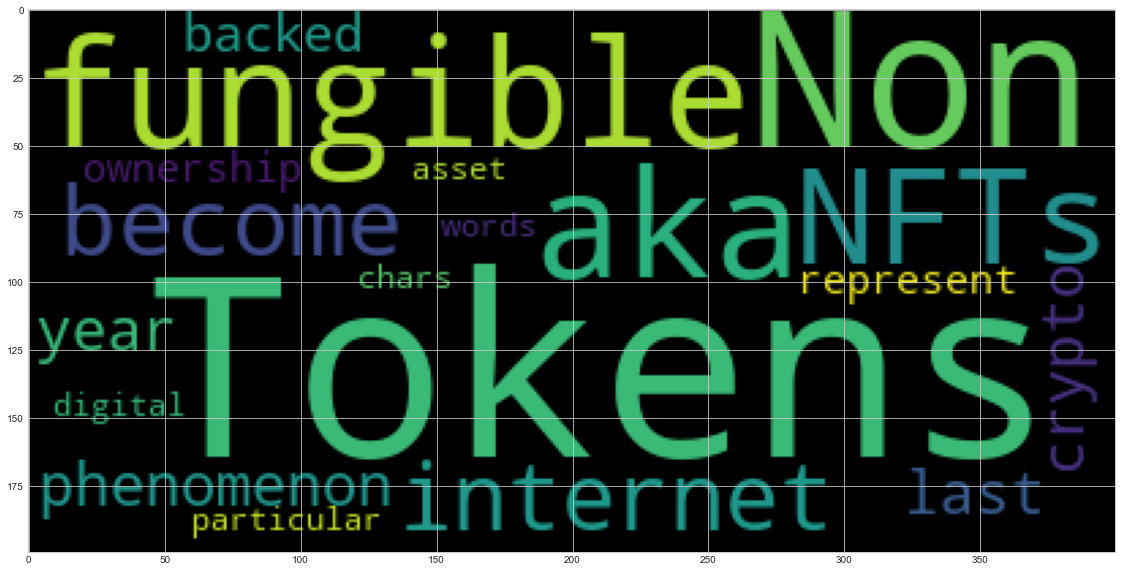

In [83]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(text)
plt.imshow(btc_wc)

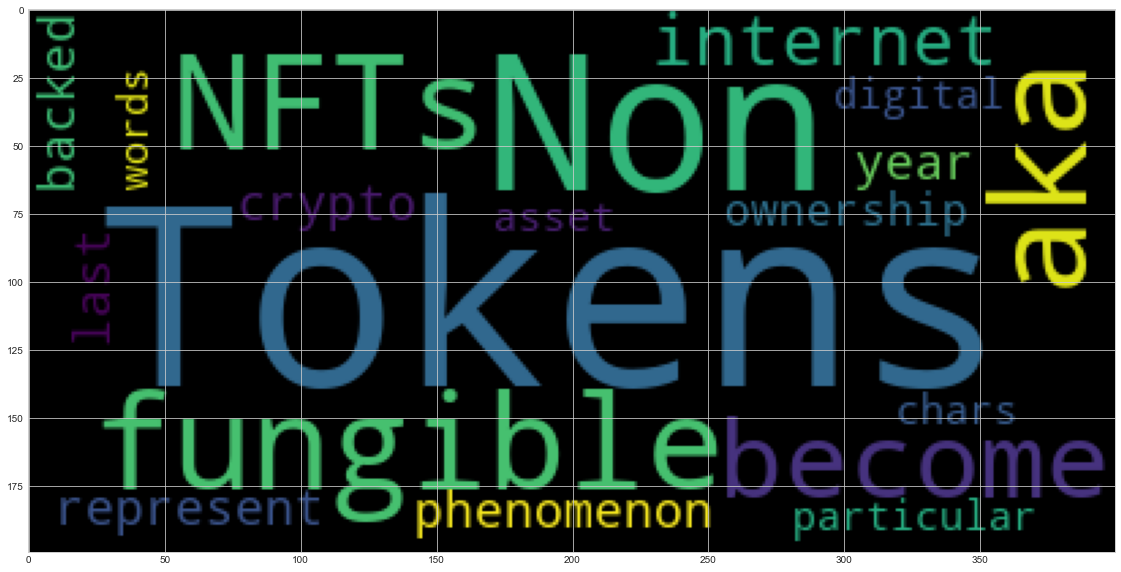

In [85]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(text)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [86]:
import spacy
from spacy import displacy

In [87]:
# Download the language model for SpaCy if needed
# !python -m spacy download en_core_web_sm


In [88]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [105]:
# Concatenate all of the Bitcoin text together
concat_btc = btc_df['text'].str.cat()
concat_btc


'NEW YORK, Feb 11 (Reuters) - Investors are bracing for more gyrations in bitcoin and other cryptocurrencies, as worries over a hawkish Federal Reserve threaten to squelch risk appetite across markets… [+5024 chars]If Sundays Super Bowl ads are any indication, crypto has truly arrived in mainstream culture. And if you didnt catch the game, you can watch the ads here, featuring Larry David, LeBron James, and a Q… [+3454 chars]Illustration by James Bareham / The Verge\r\n\n \n\n\n More than $15 million has been donated so far More than $15 million in cryptocurrency has been donated to Ukrainian groups since Russia attacked the c… [+7442 chars]Nurphoto/Getty\r\nAs Russia launched an invasion into his home country last Thursday, Ukranian photographer Vitaliy Raskalov found himself a world away in Mexico City. When I spoke with him over Telegr… [+7815 chars]Bitcoin is likely entering a \r\nbear market, and the next major rally probably won\'t come until late 2024 or early 2025, according to

In [106]:
# Run the NER processor on all of the text
btc_doc = nlp(concat_btc)

# Add a title to the document
# YOUR CODE HERE!

In [107]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [117]:
# List all Entities
print([ent.text for ent in btc_doc.ents if ent.label_ == 'ORG'])

['Reuters', 'Federal Reserve', '+3454', 'Telegr', 'Robinson Crusoe', 'Welch', 'VP', 'Treasury', 'Lohstroh', 'Bloomberg', 'Palladium', 'Russ', 'Reuters', 'Reuters', 'Abstract', 'Visa', 'Mastercard', 'Pornhub']


---

### Ethereum NER

In [108]:
# Concatenate all of the Ethereum text together
concat_eth = eth_df['text'].str.cat()

In [109]:
# Run the NER processor on all of the text
eth_doc = nlp(concat_eth)

# Add a title to the document
# YOUR CODE HERE!

In [110]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [118]:
# List all Entities
print([ent.text for ent in eth_doc.ents if ent.label_ == 'ORG'])

['Ethereum', 'ETH-USD', 'TIME', 'Facebook', 'Microsoft', 'Massachusetts Institute of Technology', 'MIT', 'Ethereum', 'MIT', '+3186 chars]Iconic', 'Palladium', 'Russ', 'Samsung Digital Wallet', 'Samsung Digital WalIet', 'Ethereum', 'Barter', 'The Kids &', 'Family Division of TIME Studios', 'NFT', 'TIME Studios', 'Emm', 'Treasury']


---